# Exploratory Data Analysis (EDA) of the Big Market Sales dataset. 

This dataset is used in the in the chalenge Analytics Vidhya - Big Mart Sales Practice Problem.

The description of the chalenge is avaliable in: https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/#ProblemStatement

## Sales Prediction for Big Mart Outlets

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in differente cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sale of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outletes which play a key role in increaasing sales.

Please note that the data have missing values as some stores might not report all the data due to techinical gliches. Hence, it will be required to threat them accordingly.

## Data Dictionary

We have train (8523) and test (8681) data set, train data set has both input and output variables(s). You need to predict the sales for test data set.

**Train file:** CSV containing the item outlet information with sales value

| **variable**  | **Description**  | **Kind** |
|---|---|---|
| Item_Identifier | Unique product ID  | Categorial |
| Item_Weight  | Weight of product  | Numeric |
| Item_Fat_Content  | Whether the product is low fat or not  | Categorical |
| Item_Visibility  | The % of total display area of all products in a store allocated to the particular product| Numeric |
| Item_Type | The category to which the product belongs | Categorical |
| Item_MRP | Maximum Retail Price (list price) of the product| Numeric |
| Outlet_Identifier	| Unique store ID | Categorical |
| Outlet_Establishment_Year | The year in which store was established | Numeric |
| Outlet_Size | The size of the store in terms of ground area covered | Categorical |
| Outlet_Location_Type | The type of city in which the store is located | Categorical |
| Outlet_Type | Whether the outlet is just a grocery store or some sort of supermarket | Categorical |
| Item_Outlet_Sales | Sales of the product in the particular store. This is the outcome variable to be predicted. | Numeric - _Target_ |


## Loading the data

WThe first step with this dataset information is to load the data into the workspace. To do this, I'll use `pandas`, a powerful tool for working with data in Python. To read a csv file with pandas, simply use the method `.read csv` and pass the file name as an argument to the method. And the function `head()` will give you an overview of the dataset's structure, the number of columns, and how the files are filled. The function `head` displays the DataFrame's first five rows.

In [15]:
import pandas as pd

df_big_mart = pd.read_csv('train_v9rqX0R.csv')

df_big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Summarizing the data

Now we can see that the categorical variables in the dataset are all stored as strings, and in line 3 we have our first missing value. To see if there are any more missing values in the dataset, use the method info ().

In [16]:
df_big_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Hopefully, the majority of the variables have little missing data. This simplifies our analysis. Only the columns Item_Weight and Outlet_Size appear to have missing values. And the column with the most missing values is Outlet Size.

In the following cell, I'm using the method `describe` to display a summary of all the dataset's numeric columns.

In [17]:
df_big_mart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


We can now see a summary of the numerical variables in the dataset. Only the 'Item_Weight' column has missing values when only the numerical columns of the dataset are considered. 'Item_Visibility' has the lowest values, so I assume it represents a percentile value. The highest values are found in 'Item_Outlet Sales,' with values ranging from 2181.289 to 13086.965. The 'Outlet_Establishment_Year' column reveals that the dataset begins in 1997 and ends in 2009.

## Data Analysis

### Numerical Variables

#### Outlet Estabilishment Year vs Item Outlet Sales

The following cell contains a bar chart that displays the total of "Item Outlet Sales" per Year of Establishment.

<AxesSubplot:ylabel='Outlet_Establishment_Year'>

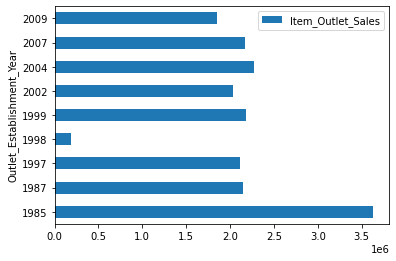

In [18]:
import matplotlib.pyplot as plt

df_big_mart.groupby('Outlet_Establishment_Year').sum().plot(kind='barh', y='Item_Outlet_Sales')

Stores founded in 1998 had the lowest number of sales, while stores founded in 1985 had the highest number of sales. However, when the results for the other years of establishment are considered, it is possible to conclude that these two years are outliers because all of the other years had similar performances and these two had results that were significantly different from the others.

#### Item Visibility

To analyze the Item Visibility I'll plot a boxplot.

<AxesSubplot:>

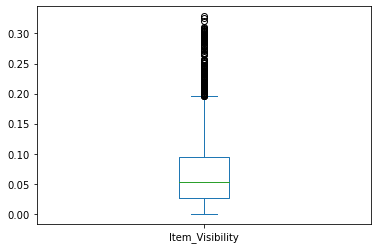

In [19]:
df_big_mart['Item_Visibility'].plot(kind='box')

The boxplot above depicts the variation in "visibility." The median for this variable is 0.05, and the interquartile distance (the distance between the first and third quartiles) is approximately 0.09. Without outliers, the minimum is 0.00 and the maximum is 0.20. However, this variable contains a large number of outliers, which will need to be addressed in future analyses.

#### Item Weight

I'll look at the histogram for "Item Weight." When the chart does not have many picks and valleys and the majority of the columns have similar heights, the histogram shows that the distribution of this variable is very homogeneous. Items with a weight near 7.5 are the most common, while items with a weight near 5.0 are the least common.

<AxesSubplot:ylabel='Frequency'>

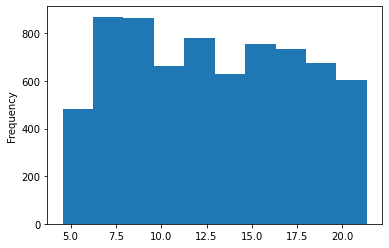

In [20]:
df_big_mart['Item_Weight'].plot(kind='hist')

### Categorical Variables

#### Item Fat Content

In [21]:
df_big_mart['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

The "Big Fat Content" is classified into five categories: LF, Low Fat, Regular, low fat, reg. However, LF, Low Fat, and Low Fat are all the same thing. Similarly, Regular and reg refer to the same category. In the next cell, I'll map the values to only two classes: Low Fat and Regular.

In [26]:
map_dic = {'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}
df_big_mart['Item_Fat_Content'] = df_big_mart['Item_Fat_Content'].map(map_dic)
df_big_mart['Item_Fat_Content'].value_counts()

Low Fat    428
Regular    117
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content'>

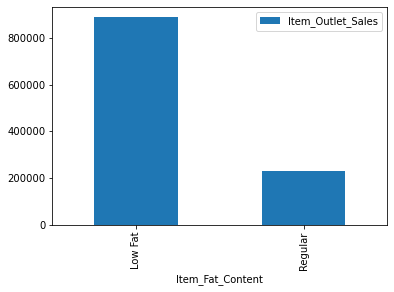

In [22]:

df_big_mart.groupby('Item_Fat_Content').sum().plot(kind='bar', y='Item_Outlet_Sales')


After grouping the items by "Fat Content," we can see that the items with the lowest fat content are the most popular and profitable.

#### Item Type

The market contains 16 different types of items, which are all listed in the chart below. Fruits and vegetables, as well as snack foods, have the highest sales volume. In this market, seafood and Breakfest aren't as popular.

In [27]:
df_big_mart['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<AxesSubplot:ylabel='Item_Type'>

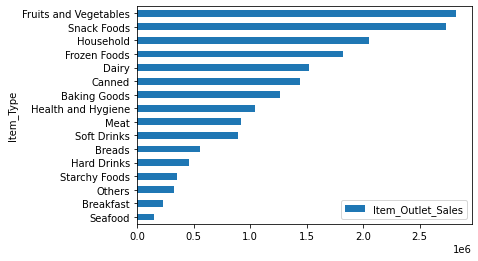

In [23]:
df_big_mart.groupby('Item_Type').sum().sort_values(by='Item_Outlet_Sales').plot(kind='barh', y='Item_Outlet_Sales')

#### Outlet Location Type

Now we see the distribution of location type. Major of the items are located in Tier 1 and Tier 2. 

<AxesSubplot:ylabel='Item_Outlet_Sales'>

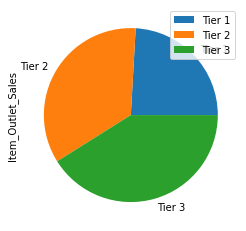

In [24]:
df_big_mart.groupby('Outlet_Location_Type').sum().plot(kind='pie', y='Item_Outlet_Sales')

#### Outlet Type

<AxesSubplot:ylabel='Item_Outlet_Sales'>

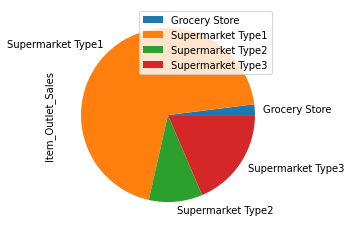

In [25]:
df_big_mart.groupby('Outlet_Type').sum().plot(kind='pie', y='Item_Outlet_Sales')